In [18]:
from bs4 import BeautifulSoup
import urllib
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
plt.xkcd()

In [19]:
# get the soup
r = urllib.urlopen('http://insightdatascience.com/fellows').read()
soup = BeautifulSoup(r,"lxml")

In [20]:
# find tooltip info containing project descriptions
project_tooltip_list=soup.find_all("div", class_="tooltip_project")
# extract project description (removing title as all text before colon)
project_list = [project.get_text().lower().split(':')[-1] 
                for project in project_tooltip_list 
                if ':' in project.get_text()]
# tokenizing (separating words)
tokenized_project_list = [nltk.word_tokenize(project) for project in project_list]
# add parts of speech, creating (word, POS) tuples
pos_tagged_list = [nltk.pos_tag(word_list) for word_list in tokenized_project_list]
# flatten list
word_and_pos_list = [data for project in pos_tagged_list for data in project]
# remove stop words and short words
filtered_word_and_pos_list = [data for data in word_and_pos_list 
                              if data[0] not in stopwords.words('english') 
                              and len(data[0]) > 2]

In [21]:
# lemmatizing (removing ending from words)

# function to convert treebank POS codes to wordnet codes
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # use noun as default

lemmatizer = WordNetLemmatizer()
lemmatized_word_list = [lemmatizer.lemmatize(word_and_pos[0],
                                             pos=get_wordnet_pos(word_and_pos[1])) 
                        for word_and_pos in filtered_word_and_pos_list]

In [33]:
# counting word occurrence frequency
word_and_count_list = [(word.title(), lemmatized_word_list.count(word)) 
                       for word in list(set(lemmatized_word_list))]
word_and_count_list.sort(key=lambda x: x[1], reverse=True)
print 'Count \tWord'
print '----- \t----'
for word in word_and_count_list:
    print word[1], '\t', word[0]

Count 	Word
----- 	----
87 	Find
47 	Predict
21 	Help
20 	Make
19 	New
17 	User
17 	Recommendation
15 	Data
15 	Discover
15 	News
14 	Base
14 	Best
13 	Search
13 	Identify
13 	Optimize
12 	Get
10 	Music
10 	Recommend
10 	Route
10 	City
10 	Recommender
10 	Improve
10 	Restaurant
10 	Engine
10 	Game
10 	Twitter
9 	Video
9 	Social
9 	Use
9 	Next
9 	Good
9 	Place
9 	Tool
9 	Track
9 	Review
9 	Local
9 	People
8 	Tweet
8 	Neighborhood
8 	Classify
8 	Event
8 	Price
8 	Like
8 	Time
7 	Prediction
7 	Live
7 	Perfect
7 	Future
7 	Art
7 	Great
7 	N'T
7 	Student
7 	Know
7 	Right
7 	Image
6 	Rate
6 	Love
6 	Campaign
6 	Product
6 	York
6 	Estimate
6 	One
6 	Engagement
6 	Need
6 	Potential
6 	Mobile
6 	Startup
6 	Movie
6 	Discovery
6 	Online
6 	Learning
6 	Beer
6 	Match
6 	Success
6 	Market
6 	Favorite
6 	Predictor
6 	Way
6 	Trip
6 	Yelp
5 	Nba
5 	Customer
5 	Learn
5 	High
5 	Nyc
5 	Course
5 	Network
5 	Content
5 	Park
5 	Github
5 	Project
5 	Performance
5 	Dog
5 	Detection
5 	Forecast
5 	Job
5 	Comme

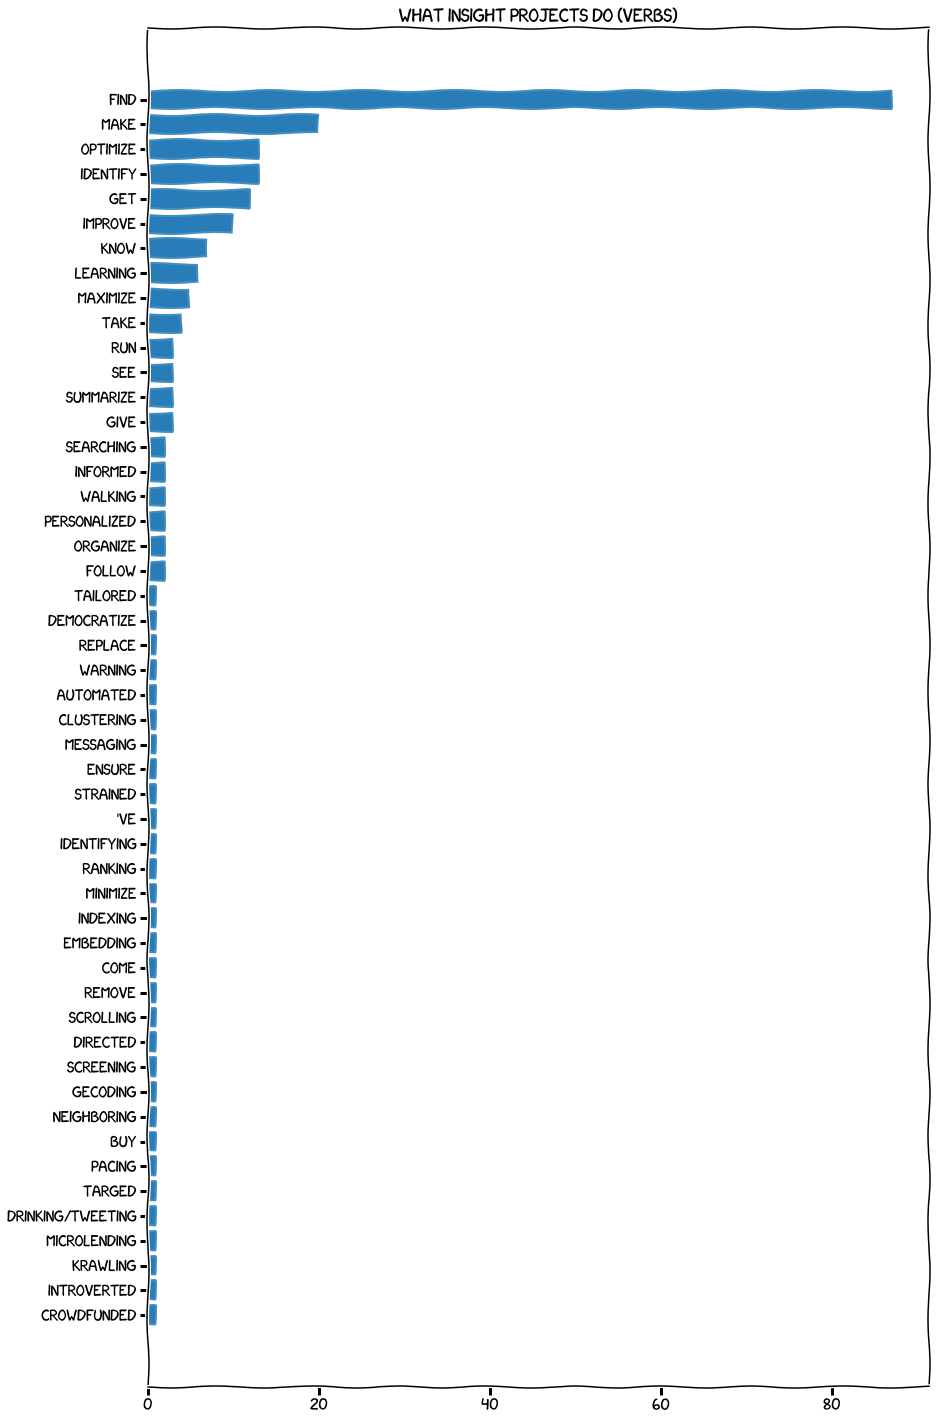

In [37]:
# make frequency bar plots split by POS

frequency_data_by_pos = {}
frequency_data_by_pos[wordnet.ADJ] = []
frequency_data_by_pos[wordnet.VERB] = []
frequency_data_by_pos[wordnet.NOUN] = []
frequency_data_by_pos[wordnet.ADV] = []

# reverse order so plots look better
word_and_count_list.sort(key=lambda x: x[1])

for word in word_and_count_list:
    pos = get_wordnet_pos(nltk.pos_tag([word[0].lower()])[0][1])
    frequency_data_by_pos[pos].append(word)

num_plotted = 50

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = num_plotted/2
plt.rcParams["figure.figsize"] = fig_size

labels, counts = zip(*frequency_data_by_pos[wordnet.VERB][-num_plotted:])
y_pos = np.arange(len(counts))
plot=plt.barh(y_pos, 
              counts,
              align='center', 
              alpha=0.8,
              edgecolor = "none",
              linewidth=0, 
              tick_label=labels)
plt.title('What Insight projects do (verbs)')
plt.show()

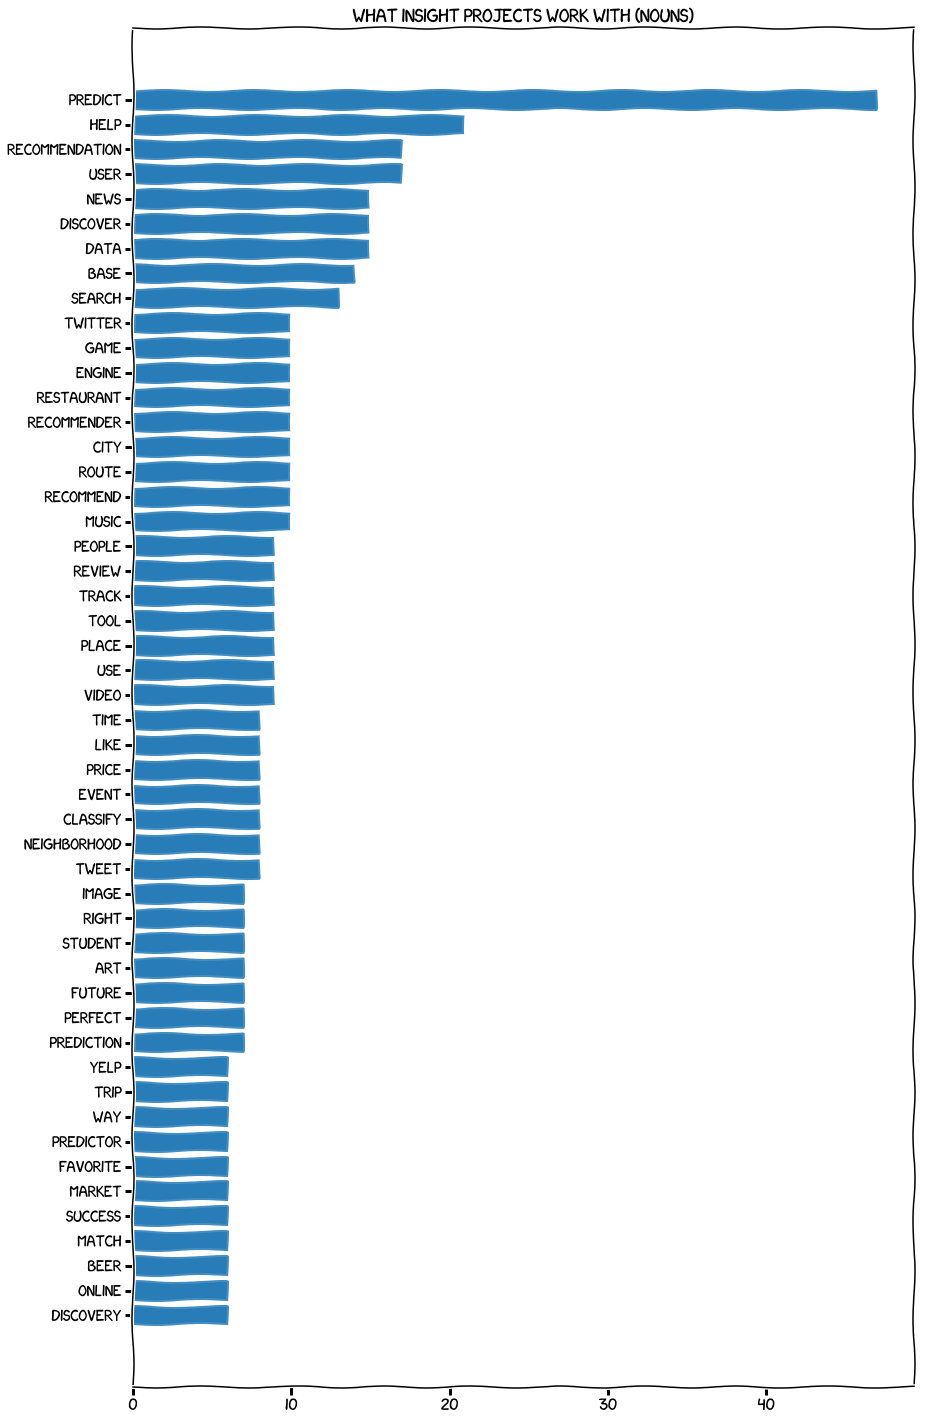

In [38]:
labels, counts = zip(*frequency_data_by_pos[wordnet.NOUN][-num_plotted:])
y_pos = np.arange(len(counts))
plot=plt.barh(y_pos,
              counts, 
              align='center', 
              alpha=0.8,
              edgecolor = "none",
              linewidth=0,
              tick_label=labels)
plt.title('What Insight projects work with (nouns)')
plt.show()

In [ ]:
# print word list as capitalized for the word cloud
for word in lemmatized_word_list:
    print word.title()